#### IMPORTING NECESSARY LIBRARIES

In [9]:
import os
import numpy as np
import pandas as pd


import warnings
warnings.filterwarnings("ignore")

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

#### READING THE FILES AND LOADING THEM INTO DATAFRAME

In [12]:
folder_path = r"C:\Users\sohil\OneDrive\Desktop\Data\Data\Project Data"

df = {}
for file in os.listdir(folder_path):
    if file.endswith(".csv") and file[:-4] != "order_reviews":
        file_path = os.path.join(folder_path, file)
        df[file[:-4]] = pd.read_csv(file_path)


for key, value in df.items():
    print("*"*20, key.upper(), "*"*20)
    print(value.shape)
    display(df[key].sample(3))
    print()

******************** CUSTOMERS ********************
(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
22311,9f895a063a0c9aaca1898ec6692bab6d,9d56c7f19bb52350060501132d6f6f7f,27265,volta redonda,RJ
95358,d697b4cd06da932225ff33cec30cea73,bdd399d592854b120e9c206ace361af9,13602,araras,SP
17136,3ff2b7b4797e590bf4d38310c565a009,bb1d05dd96aa45b81fe834433ac2fb23,31615,belo horizonte,MG



******************** GEOLOCATION ********************
(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
611684,36190,-21.195072,-43.348880,merces,MG
537938,29500,-20.761810,-41.532124,alegre,ES
935902,89810,-27.066170,-52.639388,chapeco,SC



******************** ORDERS ********************
(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
19038,e0172fe93d1e49afb84d1b9041640b18,d212b0357f43fcec95b63166e2b49bca,delivered,2017-09-27 18:48:59,2017-09-28 02:50:05,2017-09-28 19:57:53,2017-10-02 19:29:05,2017-10-13 00:00:00
48804,df3d38bb02fc5e5bc7eb264985ca97b1,555775a9601baea5bd2e64b3a403d483,delivered,2018-03-07 07:56:12,2018-03-07 08:09:09,2018-03-08 03:08:53,2018-03-16 22:08:59,2018-03-27 00:00:00
78963,9b0f1e1427db19a11c3ab29e6ebf4846,c353e4d9ce4b56d736c8e8149d106e51,delivered,2018-07-29 13:31:50,2018-08-01 16:31:37,2018-07-31 15:04:00,2018-08-01 19:28:56,2018-08-02 00:00:00



******************** ORDER_ITEMS ********************
(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
108849,f75d10ef288341085a1387de1052dfb7,4,92c92e54ea03085ca64e3556bdc18689,7c67e1448b00f6e969d365cea6b010ab,2017-11-15 23:55:49,79.99,21.21
70138,a00afe395584af6a6a6fcddd256c8c7f,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-01-11 23:37:25,69.90,13.08
103390,ead00e0026023c03ce71d6d072050bf6,1,5dfc84369c7457e1bd188be86a7563f0,1464afc72f696af775557a821c2e253f,2018-04-26 15:31:09,29.90,18.23



******************** ORDER_PAYMENTS ********************
(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
20455,27305b6f34b0b06a5323934d520c62b4,1,credit_card,3,31.69
55839,13d06edeb94fa2372f6ec6fe8a5a5345,1,boleto,1,27.24
31087,99040bfab9f5595ad65fbe6185957d96,1,credit_card,1,87.64



******************** PRODUCTS ********************
(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
30334,bba2c8c0d830b5d1eb20f4a343676de5,telefonia,39.0,258.0,2.0,200.0,19.0,4.0,11.0
27031,f1f762d742a61bd111909093655c621d,beleza_saude,58.0,119.0,1.0,700.0,18.0,18.0,18.0
31962,f0bbc1bdaf90ddcab4aa862660dfc6d3,malas_acessorios,60.0,993.0,3.0,650.0,65.0,7.0,11.0



******************** SELLERS ********************
(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
1241,b5e3e38609125694d2ea2417522a60b7,88020,florianopolis,SC
2863,1ca7077d890b907f89be8c954a02686a,6506,santana de parnaiba,SP
1666,ca4b77513ac2040591b0d8fae6958380,9190,sando andre,SP


#### DESCRIPTIVE STATS OF DATA FILES

In [14]:
not_describe = ['customers', 'geolocation', 'sellers']
for key, value in df.items():
    if key not in not_describe:
        display(df[key].describe())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### BASIC CLEANING

In [16]:
# UPDATING SELLERS TABLE HEADERS
df['sellers'].columns = df['sellers'].columns.str.replace("seller_","")\
                      .str.replace("_prefix", "")

In [17]:
# NULL & DUPLICATE IN SELLERS DATA
df['sellers'].isna().sum().sum(), df['sellers'].duplicated().sum()

(0, 0)

In [18]:
# UPDATING PRODUCT TABLE HEADERS & NULL AND DUPLICATE FOR THAT DATA
df['products'].columns = df['products'].columns.str.replace('product_', "")
df['products'].isna().sum().sum(), df['products'].duplicated().sum()

(2448, 0)

In [19]:
# NULL VALUES PERCENTAGE IN PRODUCTS COLUMNS
df['products'].isna().sum().apply(lambda x : (x/len(df['products'])*100))

id                    0.000000
category_name         1.851234
name_lenght           1.851234
description_lenght    1.851234
photos_qty            1.851234
weight_g              0.006070
length_cm             0.006070
height_cm             0.006070
width_cm              0.006070
dtype: float64

In [20]:
# FILTERED OUT THE NULL VALUES IN PRODUCTS DATA 
df['products'] = df['products'][(~df['products']['category_name'].isna())]

In [21]:
# UPDATING CUSTOMER TABLE COLUMNS NAMES
df['customers'].columns = df['customers'].columns.str.replace("customer_","").str.replace("_prefix", "")

In [22]:
# THE NULL AND DUPLICATE VALUES IN CUSTOMERS TABLE
df['customers'].isna().sum().sum(), df['customers'].duplicated().sum().sum()

(0, 0)

In [23]:
# UPDATING GEOLOCATION HEADERS
df['geolocation'].columns = df['geolocation'].columns.str.replace('geolocation_',"")\
                    .str.replace("_prefix", "")\
                    .str.replace("lat", "latitude")\
                    .str.replace("lng", "longitute")

In [24]:
# NULL AND DUPLICATES IN GEOLOCATION
df['geolocation'].isna().sum().sum(), df['geolocation'].duplicated().sum().sum()

(0, 261831)

In [25]:
# DROPPING DUPLICATES
df['geolocation'].drop_duplicates(keep='first', inplace=True)

In [26]:
# UPDATING COLUMNS HEADERS IN ORDERS 
df['orders'].columns = df['orders'].columns.str.replace('orders_',"")
df['orders'].columns = df['orders'].columns.str.replace('order_',"")

In [27]:
# UPDATING THE DATATYPES
date_col = ['purchase_timestamp', 'approved_at', 'delivered_carrier_date', 'delivered_customer_date', 'estimated_delivery_date']

for col in df['orders'].columns:
    if col in date_col:
        df['orders'][col] = pd.to_datetime(df['orders'][col])

In [28]:
df['orders']['quantity'] = np.random.randint(1,20, size=len(df['orders']))

### BUSINESS PROBLEMS

### PROBELM 1. 
### Finance team wants to optimize payment infrastructure.
* Revenue contribution by payment type (credit card, boleto, etc.)
* Average order value by payment type

#### Installment behavior:
* Do higher installments lead to higher cart value?
* Failed or canceled order impact on revenue


In [31]:
df.keys()

dict_keys(['customers', 'geolocation', 'orders', 'order_items', 'order_payments', 'products', 'sellers'])

In [32]:
# Revenue contribution by payment type (credit card, boleto, etc.
revenue = df['order_payments'].groupby('payment_type')['payment_value'].sum()\
                    .reset_index()\
                    .sort_values(by='payment_value', ascending= False)
revenue = revenue[revenue['payment_type']!= 'not_defined']
revenue

,payment_type,payment_value
1,credit_card,12542084.19
0,boleto,2869361.27
4,voucher,379436.87
2,debit_card,217989.79


In [93]:
# Average order value by payment type
temp = df['orders'].merge(
    df['order_items'],
    how='inner',
    left_on='id',
    right_on='order_id'
)[['quantity', 'price', 'id']]

temp1 = temp.merge(
    df['order_payments'],
    how='inner',
    left_on='id',
    right_on='order_id')

temp1['revenue'] = temp1['quantity'] * temp1['price']
result = temp1.groupby('payment_type')['revenue'].mean()

result.reset_index().sort_values('revenue', ascending=False)

,payment_type,revenue
1,credit_card,1263.138980
2,debit_card,1097.839030
0,boleto,1045.451038
3,voucher,1044.520644


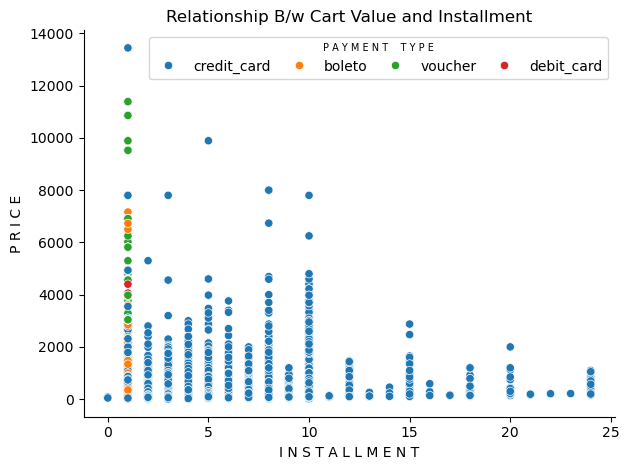

In [95]:
# Do higher installments lead to higher cart value?
cart_value = temp1.groupby('id')['price'].sum().reset_index()
cart_value = cart_value.merge(df['order_payments'], how='inner', left_on='id', right_on='order_id')[['price', 'payment_installments',
                                                                                                    'payment_value', 'payment_type']]


sns.scatterplot(x='payment_installments',
               y='price', data=cart_value,
               hue='payment_type')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Relationship B/w Cart Value and Installment')
plt.xlabel('I N S T A L L M E N T')
plt.ylabel('P R I C E')

ax.legend(
    title='P A Y M E N T    T Y P E',
    title_fontsize=7,
    ncol=4,              # all legend items in one row
    frameon=True,        # rectangular legend box
    handlelength=2,    # makes legend markers rectangular
    handleheight=1,
    columnspacing=1,
    markerscale=1
)

plt.tight_layout()
plt.show()

### CONCLUSION
#### Credit card dominates installment usage
* Only credit card payments spread across multiple installments (1–24).
* Other payment types (boleto, voucher, debit card) are mostly at 1 installment.

#### Higher prices tend to appear at lower installments
* The highest prices ( ₹ 10k – ₹ 14k range) appear mostly at: 1–4 installments
* As installments increase (> 10): Prices are much lower and tightly clustered

#### No strong linear relationship

* There is no direct linear trend between: Installments and price
* But a clear behavioral pattern exists: High price → fewer installments |  Many installments → smaller order value

### PROBLEM 2
### Product Performance & Category Analysis

#### Category managers want to improve product portfolio.
* Top revenue-generating product categories

##### Products with:
* Does product weight/size impact delivery time?

In [37]:
# Top 10 revenue-generating product categories
temp = df['products'].merge(df['order_items'], how='inner', 
                            left_on='id', right_on='product_id')[['order_id','category_name','price']]
temp1= temp.merge(df['orders'], how='inner', 
           left_on='order_id', right_on='id')[['category_name','price','status','quantity']]


temp1['revenue'] = temp1['quantity'] * temp1['price']
top_categories = temp1.groupby('category_name')['revenue'].sum().reset_index()\
                                                        .sort_values(by='revenue', ascending=False).head(10)
top_categories['category_name']= top_categories['category_name'].str.title().str.replace('_',' ')
top_categories

,category_name,revenue
11,Beleza Saude,12549922.41
66,Relogios Presentes,11979298.89
13,Cama Mesa Banho,10289631.33
32,Esporte Lazer,9933138.49
44,Informatica Acessorios,8972412.04
54,Moveis Decoracao,7329924.52
26,Cool Stuff,6345934.76
72,Utilidades Domesticas,6240176.87
8,Automotivo,5960775.63
40,Ferramentas Jardim,4866709.53


In [38]:
# Does product weight/size impact delivery time?
df['orders']['days'] = (df['orders']['delivered_customer_date'] - df['orders']['approved_at']).dt.days
orders = df['orders'].dropna( 
    subset=['delivered_customer_date', 'approved_at'])
final_df['status'] = final_df['status'].str.replace('canceled','cancelled')

orders['days'] = (orders['delivered_customer_date'] - orders['approved_at']).dt.days
orders = orders[orders['days'] >= 0]

order_weight = (
    df['order_items']
    .merge(df['products'], left_on='product_id', right_on='id')
    .groupby('order_id')['weight_g']
    .sum()
    .reset_index() )

final_df = orders.merge(order_weight, left_on='id', right_on='order_id')

sns.scatterplot(
    data=final_df,
    x=final_df['weight_g'] / 1000,   # kg
    y='days', hue='status')

sns.regplot(
    data=final_df, x=final_df['weight_g'] / 1000, y='days', scatter=False, color='red')

plt.xlabel('O R D E R    W E I G H T (K G)')
plt.ylabel('D E L I V E R Y    T I M E (D A Y S)')
plt.title('Impact of Order Weight on Delivery Time')


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(
    title='S T A T U S', title_fontsize=7, ncol=2, frameon=True, handlelength=2,  
    handleheight=1, columnspacing=0.8, markerscale=1)

plt.tight_layout()
plt.show()


NameError: name 'final_df' is not defined

### CONCLUSION
#### Relationship between weight and delivery time is weakly positive
* The red trend line slopes upward, which means: As order weight increases, delivery time tends to increase slightly
* However, the slope is not steep: Order weight has some impact, but it is not a strong driver of delivery time.

#### High variability at low weights

* For lightweight orders (0–20 kg): Delivery time ranges from a few days to over 200 days
* This large spread tells us: Weight alone cannot explain delivery delays

Order weight shows a weak positive relationship with delivery time. While heavier orders tend to take slightly longer, delivery duration is largely influenced by other operational and logistical factors. The high variability among lightweight orders indicates that weight alone is insufficient to predict delivery performance.”
  

### PROBLEM 3
### Order Fulfillment & Delivery Performance Analysis

#### Management wants to understand delivery efficiency and customer experience.
* What percentage of orders are delivered on time vs late?
* Average delivery time (order → customer) by: Customer state?

In [39]:
# What percentage of orders are delivered on time vs late?

orders = df['orders'].copy()
delivered_orders = orders[
    orders['status'] == 'delivered'
].copy()

delivered_orders['delivery_status'] = (
    delivered_orders['delivered_customer_date']
    <= delivered_orders['estimated_delivery_date'])

delivered_orders['delivery_status'] = delivered_orders['delivery_status'].map(
    {True: 'On Time', False: 'Late'})

delivery_pct = (
    delivered_orders['delivery_status']
    .value_counts(normalize=True) * 100 ).reset_index()

delivery_pct.columns = ['Delivery Status', 'Percentage']
delivery_pct



,Delivery Status,Percentage
0,On Time,91.880014
1,Late,8.119986


In [41]:
# Average delivery time (order → customer) by:--->> Customer state

delivered_orders = df['orders'][
    df['orders']['status'] == 'delivered'
].copy()

delivered_orders['delivery_days'] = (
    delivered_orders['delivered_customer_date']
    - delivered_orders['purchase_timestamp']
).dt.days

cust_orders = delivered_orders.merge(
    df['customers'][['id', 'state']],
    left_on='customer_id', right_on='id', how='left')

cust_state_delivery = (
    cust_orders
    .groupby('state', as_index=False)
    .agg(avg_delivery_days=('delivery_days', 'mean'))
    .sort_values('avg_delivery_days', ascending=False) )

cust_state_delivery.head()


,state,avg_delivery_days
21,RR,28.975610
3,AP,26.731343
2,AM,25.986207
1,AL,24.040302
13,PA,23.316068


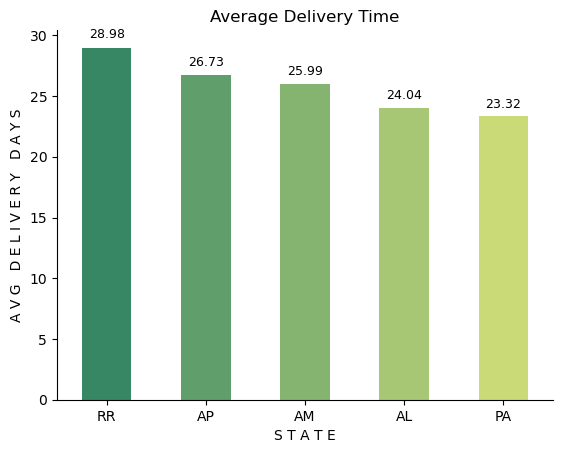

In [43]:
plt.title('Average Delivery Time')
sns.barplot(data=cust_state_delivery.head(), x='state', y='avg_delivery_days', palette='summer', width=0.5)
plt.xlabel('S T A T E')
plt.ylabel('A V G   D E L I V E R Y   D A Y S')

for x,y in cust_state_delivery.head().values:
    plt.text(x, y + 0.02*y, f"{y:.2f}", ha='center', va='bottom', fontsize=9)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### CONCLUSION:
* The analysis shows that the majority of orders (91.88%) are delivered on time, indicating strong overall logistics and fulfillment performance. However, 8.12% of orders are delivered late, which still represents a meaningful volume at scale and can negatively impact customer satisfaction. This delay segment highlights opportunities for operational improvements, particularly in seller performance and last-mile delivery efficiency. Targeted interventions in high-delay regions and with underperforming sellers could further enhance service reliability.

* The state RR is at the top in Average delivery Days and followed by AP.

### PROBLEM 3
### Logistics & Freight Cost Analysis
#### Logistics team wants to reduce shipping costs
* Freight cost as a % of product price
* Top 5 cities with highest average freight cost
* Top 5 cities with lowest average freight cost and average price ?
* Identify products where freight > product price (loss risk) & their precentage ?

In [45]:
# Freight cost as a % of product price

freight_pct = ((df['order_items']['freight_value'] / df['order_items']['price']) * 100).mean()
print(f"Freight cost as a % of product price: {freight_pct}")

Freight cost as a % of product price: 32.08635490797801


In [47]:
# Top 5 cities with highest average freight cost

temp = df['order_items'].merge(df['sellers'], how='left',
                       left_on= 'seller_id', right_on='id')[['city','freight_value','price']]
temp.groupby('city')['freight_value'].mean()\
                                     .reset_index().sort_values(by='freight_value',
                                                               ascending= False).head()   

,city,freight_value
291,lages - sc,168.533333
498,sao francisco do sul,150.220000
94,california,143.775000
490,sao jose dos pinhais,142.400000
366,nova trento,131.850000


In [49]:
# Top 5 cities with lowest average freight cost

temp = df['order_items'].merge(df['sellers'], how='left',
                       left_on= 'seller_id', right_on='id')[['city','freight_value','price']]
low_freight= temp.groupby('city')['freight_value'].mean()\
                                     .reset_index().sort_values(by='freight_value',
                                                               ascending= True).head() 

low_price= temp.groupby('city')['price'].mean()\
                                     .reset_index().sort_values(by='price',
                                                               ascending= True).head() 
display(low_freight, low_price)





,city,freight_value
267,jacarei / sao paulo,8.602222
519,sao paulo / sao paulo,9.170000
84,brotas,9.512500
522,sao pauo,9.560000
116,carapicuiba / sao paulo,11.103333


,city,price
84,brotas,6.25
382,palotina,9.99
187,floranopolis,9.99
311,macatuba,13.00
279,jarinu,14.63


In [53]:
# Identify products where freight > product price (loss risk)
df['order_items'][df['order_items']['freight_value'] > df['order_items']['price']].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
58,0025081dcf9330f9a5052ae82c6ce396,1,4e3f399366b0047a572b6682f9bb166e,5f3ae9136c875522250f8184f253413a,2018-04-02 16:35:20,14.95,18.23
80,002f98c0f7efd42638ed6100ca699b42,1,d41dc2f2979f52d75d78714b378d4068,7299e27ed73d2ad986de7f7c77d919fa,2017-08-10 09:30:15,8.99,32.57
110,003edccf16bc5ec447f592913b3df2b4,1,500870614ddcf5bd84f7d26861026c8a,ef506c96320abeedfb894c34db06f478,2018-07-12 10:15:21,14.00,50.85
125,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,702835e4b785b67a084280efca355756,2017-02-17 16:18:07,7.60,10.96
156,00602f25bffa1dcfb71e202fbf9824fb,1,32a8448d1612773bcfd0c5a8dd235e4e,86ccac0b835037332a596a33b6949ee1,2017-11-08 02:31:17,39.90,54.02


In [55]:
# Percentage of products where freight > product price (loss risk)
freight_pct = len(df['order_items'][df['order_items']['freight_value'] > df['order_items']['price']]) / len(df['order_items']) * 100
print(f'The tottal Percentage of products where freight > product price is : {freight_pct}')

The tottal Percentage of products where freight > product price is : 3.6608965823346646


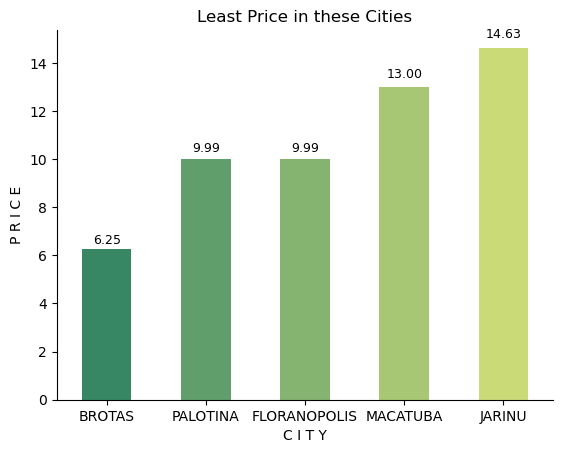

In [57]:
plt.title('Least Price in these Cities')
sns.barplot(data=low_price, x='city', y='price', palette='summer', width=0.5, 
            errorbar=('ci', 95))
plt.ylabel('P R I C E')
plt.xlabel('C I T Y')

for i, y in enumerate(low_price['price']):
    plt.text(i, y + 0.02*y, f"{y:.2f}", ha='center', va='bottom', fontsize=9)

plt.xticks(range(len(low_price)), low_price['city'].str.upper())

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


### PROBLEM 4
### Demand Trend & Seasonality Analysis
#### Operations want better inventory planning.
* Monthly and weekly order trends
* Peak demand periods

In [59]:
orders = df['orders'].copy()

valid_orders = orders[
    orders['status'].isin(['delivered', 'shipped', 'invoiced'])
].copy()

valid_orders['order_month'] = valid_orders['purchase_timestamp'].dt.to_period('M')
valid_orders['order_week'] = valid_orders['purchase_timestamp'].dt.to_period('W')
valid_orders['order_date'] = valid_orders['purchase_timestamp'].dt.date
valid_orders['weekday'] = valid_orders['purchase_timestamp'].dt.day_name()

monthly_trend = (valid_orders.groupby('order_month', as_index=False).agg(total_orders=('id', 'count')))

weekly_trend = (valid_orders.groupby('order_week', as_index=False).agg(total_orders=('id', 'count')))


In [61]:
monthly_trend['rolling_avg'] = monthly_trend['total_orders'].rolling(3).mean()

peak_periods = monthly_trend[
    monthly_trend['total_orders'] > monthly_trend['rolling_avg']]
peak_periods.sample(3)


,order_month,total_orders,rolling_avg
17,2018-03,7159,6978.333333
6,2017-04,2366,2215.000000
9,2017-07,3935,3581.666667


In [63]:
monthly_trend['rolling_avg'] = monthly_trend['total_orders'].rolling(3).mean()

peak_periods = monthly_trend[
    monthly_trend['total_orders'] > monthly_trend['rolling_avg']]

peak_periods.sample(3)


,order_month,total_orders,rolling_avg
5,2017-03,2594,1685.666667
3,2017-01,778,356.666667
18,2018-04,6911,6896.000000


# DASHBOARD

KeyError: 'id'

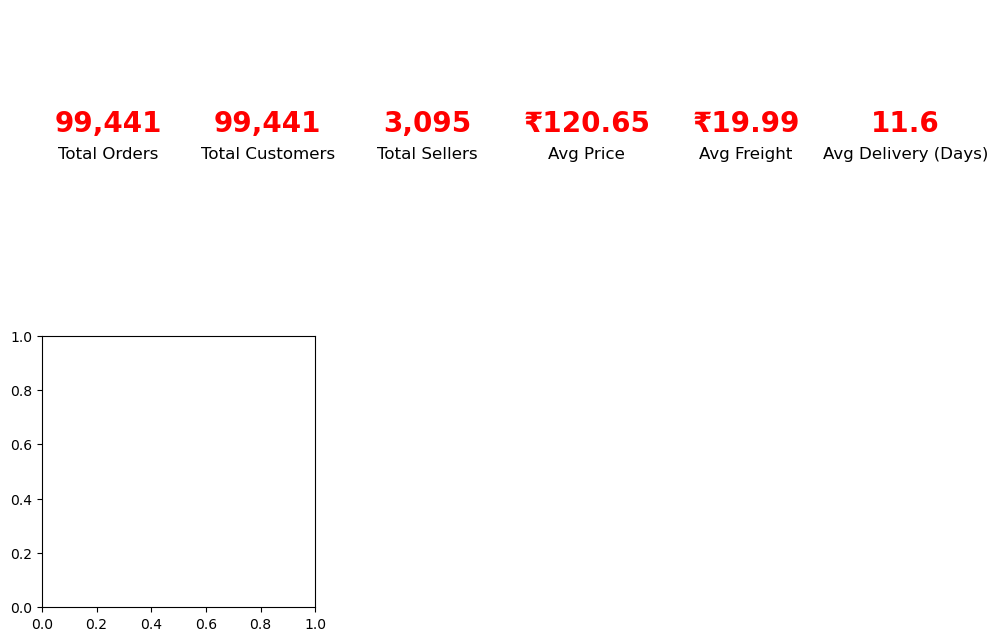

In [65]:
fig = plt.figure(figsize=(12,12))

# =============== KPI's ===============  
Total_Orders = df['orders']['id'].count() 
Total_Revenue = temp1['revenue'].sum() 
Total_Customers = df['customers']['id'].nunique() 
Total_Sellers = df['sellers']['id'].nunique() 
Average_Price = df['order_items']['price'].mean().round(2) 
Average_Freight = df['order_items']['freight_value'].mean().round(2) 
Avg_Delivery_Time = df['orders']['days'].mean().round(2)


# =============== KPI's Charts =============== 
plt.subplot2grid((3,6),(0,0))
plt.axis('off')
plt.text(0.5, 0.55, f"{Total_Orders:,}", fontsize=20, ha='center',fontweight='bold',family='DejaVu Sans', color='red')
plt.text(0.5, 0.45, "Total Orders", fontsize=12, ha='center')

plt.subplot2grid((3,6),(0,1))
plt.axis('off')
plt.text(0.5, 0.55, f"{Total_Customers:,}", fontsize=20, ha='center',fontweight='bold', family='DejaVu Sans', color='red')
plt.text(0.5, 0.45, "Total Customers", fontsize=12, ha='center')

plt.subplot2grid((3,6),(0,2))
plt.axis('off')
plt.text(0.5, 0.55, f"{Total_Sellers:,}", fontsize=20, ha='center',fontweight='bold', family='DejaVu Sans', color='red')
plt.text(0.5, 0.45, "Total Sellers", fontsize=12, ha='center')

plt.subplot2grid((3,6),(0,3))
plt.axis('off')
plt.text(0.5, 0.55, f"₹{Average_Price:,.2f}", fontsize=20, ha='center',fontweight='bold', family='DejaVu Sans', color='red')
plt.text(0.5, 0.45, "Avg Price", fontsize=12, ha='center')

plt.subplot2grid((3,6),(0,4))
plt.axis('off')
plt.text(0.5, 0.55, f"₹{Average_Freight:,.2f}", fontsize=20, ha='center', fontweight='bold', family='DejaVu Sans', color='red')
plt.text(0.5, 0.45, "Avg Freight", fontsize=12, ha='center')

plt.subplot2grid((3,6),(0,5))
plt.axis('off')
plt.text(0.5, 0.55, f"{Avg_Delivery_Time:.1f}", fontsize=20, ha='center', fontweight='bold', color='red', family='DejaVu Sans')
plt.text(0.5, 0.45, "Avg Delivery (Days)", fontsize=12, ha='center');


# =============== SCATTER PLOT =============== 
plt.subplot2grid((3,3), (1,0))
# Do higher installments lead to higher cart value?
cart_value = temp1.groupby('id')['price'].sum().reset_index()
cart_value = cart_value.merge(df['order_payments'], how='inner', left_on='id', right_on='order_id')[['price', 'payment_installments',
                                                                                                    'payment_value', 'payment_type']]
sns.scatterplot(x='payment_installments', y='price', data=cart_value, hue='payment_type')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Relationship B/w Cart Value and Installment')
plt.xlabel('I N S T A L L M E N T')
plt.ylabel('P R I C E')
ax.legend(
    title='P A Y M E N T    T Y P E')


# ======================= SCATTER PLOT 2 =======================
df['orders']['days'] = (df['orders']['delivered_customer_date'] - df['orders']['approved_at']).dt.days
orders = df['orders'].dropna( subset=['delivered_customer_date', 'approved_at'])
final_df['status'] = final_df['status'].str.replace('canceled','cancelled')

orders['days'] = (orders['delivered_customer_date'] - orders['approved_at']).dt.days 
orders = orders[orders['days'] >= 0]

order_weight = ( df['order_items'] .merge(df['products'], left_on='product_id', right_on='id') .groupby('order_id')['weight_g'].sum().reset_index() )
final_df = orders.merge(order_weight, left_on='id', right_on='order_id')

plt.subplot2grid((3,3), (1,1))
sns.scatterplot(data=final_df, x=final_df['weight_g'] / 1000,y='days', hue='status')
sns.regplot(data=final_df, x=final_df['weight_g'] / 1000, y='days', scatter=False, color='red')

plt.xlabel('O R D E R    W E I G H T (K G)')
plt.ylabel('D E L I V E R Y    T I M E (D A Y S)')
plt.title('Impact of Order Weight on Delivery Time')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(title='S T A T U S', title_fontsize=7, ncol=2, frameon=True, handlelength=1, handleheight=1, columnspacing=0.7, markerscale=1)



# ============================= BAR CHART DELIVERY PERFORMENCE ===============================
plt.subplot2grid((3,3), (1,2))
plt.title('Average Delivery Time')
sns.barplot(data=cust_state_delivery.head(), x='state', y='avg_delivery_days', palette='summer', width=0.5)
plt.xlabel('S T A T E')
plt.ylabel('A V G   D E L I V E R Y   D A Y S')

for x,y in cust_state_delivery.head().values:
    plt.text(x, y + 0.02*y, f"{y:.2f}", ha='center', va='bottom', fontsize=9)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



# ================================ PIE CHART FOR ON-TIME VS LATE ======================================
plt.subplot2grid((3,3), (2,0))
colors = sns.color_palette("summer", len(delivery_pct))
plt.pie(delivery_pct['Percentage'], labels=delivery_pct['Delivery Status'], autopct='%1.1f%%', startangle=45, colors=colors,
    explode=[0.05]*len(delivery_pct), pctdistance=0.75, labeldistance=1.05,wedgeprops={'edgecolor': 'white', 'linewidth': 1}, shadow=True)
# Donut effect (professional look)
centre_circle = plt.Circle((0,0), 0.55, fc='white')
plt.gca().add_artist(centre_circle)
plt.title( 'Delivery Performance: On-Time vs Late')


# ================================ BAR CHART FOR LEAST PRICE ======================================
plt.subplot2grid((3,3), (2,1))
plt.title('Least Price in these Cities')
sns.barplot(data=low_price, x='city', y='price', palette='summer', width=0.5, errorbar=('ci', 95))
plt.ylabel('P R I C E')
plt.xlabel('C I T Y')

for i, y in enumerate(low_price['price']):
    plt.text(i, y + 0.02*y, f"{y:.2f}", ha='center', va='bottom', fontsize=9)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(range(len(low_price)), low_price['city'].str.upper(), rotation=25)


# ========================================= LINE PLOT ==============================================
orders = df['orders'].copy()
valid_orders = orders[orders['status'].isin(['delivered', 'shipped', 'invoiced'])].copy()
valid_orders['order_month'] = valid_orders['purchase_timestamp'].dt.to_period('M')
valid_orders['order_week'] = valid_orders['purchase_timestamp'].dt.to_period('W')
valid_orders['order_date'] = valid_orders['purchase_timestamp'].dt.date
valid_orders['weekday'] = valid_orders['purchase_timestamp'].dt.day_name()
monthly_trend = (valid_orders.groupby('order_month', as_index=False).agg(total_orders=('id', 'count')))
weekly_trend = (valid_orders.groupby('order_week', as_index=False).agg(total_orders=('id', 'count')))
#--------------------------------------------------------------------------------------
# PLOTTING - LINE
monthly_trend['order_month'] = monthly_trend['order_month'].dt.to_timestamp()
plt.subplot2grid((3,3), (2,2))
plt.plot(monthly_trend['order_month'],monthly_trend['total_orders'],marker='o',linewidth=2, color='green')

plt.title('Yearly Order Demand Trend')
plt.xlabel('Y E A R', fontsize=12)
plt.ylabel('O R D E R S', fontsize=12)

# Show only year on x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Styling
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.tight_layout()
plt.rcParams['font.family'] = 'Segoe UI Emoji'
plt.suptitle("📊⚡E-Commerce KPI Dashboard 💰🛒", fontsize=25, color='red',y=0.95)

plt.show()

KeyError: 'id'

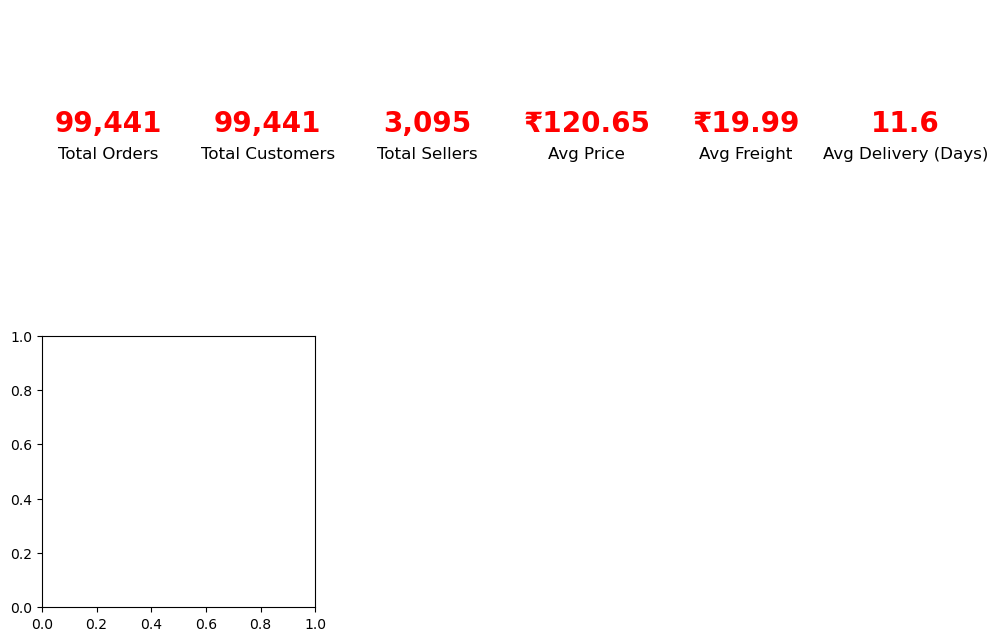

In [87]:
fig = plt.figure(figsize=(12,12))

# =============== KPI's ===============  
Total_Orders = df['orders']['id'].count() 
Total_Revenue = temp1['revenue'].sum() 
Total_Customers = df['customers']['id'].nunique() 
Total_Sellers = df['sellers']['id'].nunique() 
Average_Price = df['order_items']['price'].mean().round(2) 
Average_Freight = df['order_items']['freight_value'].mean().round(2) 
Avg_Delivery_Time = df['orders']['days'].mean().round(2)


# =============== KPI's Charts =============== 
plt.subplot2grid((3,6),(0,0))
plt.axis('off')
plt.text(0.5, 0.55, f"{Total_Orders:,}", fontsize=20, ha='center',fontweight='bold',family='DejaVu Sans', color='red')
plt.text(0.5, 0.45, "Total Orders", fontsize=12, ha='center')

plt.subplot2grid((3,6),(0,1))
plt.axis('off')
plt.text(0.5, 0.55, f"{Total_Customers:,}", fontsize=20, ha='center',fontweight='bold', family='DejaVu Sans', color='red')
plt.text(0.5, 0.45, "Total Customers", fontsize=12, ha='center')

plt.subplot2grid((3,6),(0,2))
plt.axis('off')
plt.text(0.5, 0.55, f"{Total_Sellers:,}", fontsize=20, ha='center',fontweight='bold', family='DejaVu Sans', color='red')
plt.text(0.5, 0.45, "Total Sellers", fontsize=12, ha='center')

plt.subplot2grid((3,6),(0,3))
plt.axis('off')
plt.text(0.5, 0.55, f"₹{Average_Price:,.2f}", fontsize=20, ha='center',fontweight='bold', family='DejaVu Sans', color='red')
plt.text(0.5, 0.45, "Avg Price", fontsize=12, ha='center')

plt.subplot2grid((3,6),(0,4))
plt.axis('off')
plt.text(0.5, 0.55, f"₹{Average_Freight:,.2f}", fontsize=20, ha='center', fontweight='bold', family='DejaVu Sans', color='red')
plt.text(0.5, 0.45, "Avg Freight", fontsize=12, ha='center')

plt.subplot2grid((3,6),(0,5))
plt.axis('off')
plt.text(0.5, 0.55, f"{Avg_Delivery_Time:.1f}", fontsize=20, ha='center', fontweight='bold', color='red', family='DejaVu Sans')
plt.text(0.5, 0.45, "Avg Delivery (Days)", fontsize=12, ha='center');


# =============== SCATTER PLOT =============== 
plt.subplot2grid((3,3), (1,0))
# Do higher installments lead to higher cart value?
cart_value = temp1.groupby('id')['price'].sum().reset_index()
cart_value = cart_value.merge(df['order_payments'], how='inner', left_on='id', right_on='order_id')[['price', 'payment_installments',
                                                                                                    'payment_value', 'payment_type']]
sns.scatterplot(x='payment_installments', y='price', data=cart_value, hue='payment_type')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Relationship B/w Cart Value and Installment')
plt.xlabel('I N S T A L L M E N T')
plt.ylabel('P R I C E')
ax.legend(
    title='P A Y M E N T    T Y P E')


# ======================= SCATTER PLOT 2 =======================
df['orders']['days'] = (df['orders']['delivered_customer_date'] - df['orders']['approved_at']).dt.days
orders = df['orders'].dropna( subset=['delivered_customer_date', 'approved_at'])
final_df['status'] = final_df['status'].str.replace('canceled','cancelled')

orders['days'] = (orders['delivered_customer_date'] - orders['approved_at']).dt.days 
orders = orders[orders['days'] >= 0]

order_weight = ( df['order_items'] .merge(df['products'], left_on='product_id', right_on='id') .groupby('order_id')['weight_g'].sum().reset_index()  )
# final_df = orders.merge(order_weight, left_on='id', right_on='order_id')

# plt.subplot2grid((3,3), (1,1))
# sns.scatterplot(data=final_df, x=final_df['weight_g'] / 1000,y='days', hue='status')
# sns.regplot(data=final_df, x=final_df['weight_g'] / 1000, y='days', scatter=False, color='red')

# plt.xlabel('O R D E R    W E I G H T (K G)')
# plt.ylabel('D E L I V E R Y    T I M E (D A Y S)')
# plt.title('Impact of Order Weight on Delivery Time')

# ax = plt.gca()
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.legend(title='S T A T U S', title_fontsize=7, ncol=2, frameon=True, handlelength=1, handleheight=1, columnspacing=0.7, markerscale=1)



In [75]:
df['order_items']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [73]:
df.keys()

dict_keys(['customers', 'geolocation', 'orders', 'order_items', 'order_payments', 'products', 'sellers'])

In [77]:
df['products']

,id,category_name,name_lenght,description_lenght,photos_qty,weight_g,length_cm,height_cm,width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [79]:
orders

,id,customer_id,status,purchase_timestamp,approved_at,delivered_carrier_date,delivered_customer_date,estimated_delivery_date,quantity,days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,10,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,11,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9,2.0
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,19,8.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,3,22.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,19,24.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17,17.0


In [89]:
# Do higher installments lead to higher cart value?
cart_value = temp1.groupby('id')['price'].sum().reset_index()
cart_value = cart_value.merge(df['order_payments'], how='inner', left_on='id', right_on='order_id')[['price', 'payment_installments',
                                                                                                    'payment_value', 'payment_type']]
sns.scatterplot(x='payment_installments', y='price', data=cart_value, hue='payment_type')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Relationship B/w Cart Value and Installment')
plt.xlabel('I N S T A L L M E N T')
plt.ylabel('P R I C E')
ax.legend(
    title='P A Y M E N T    T Y P E')

KeyError: 'id'